# Lecture 07: Introduction to sklearn and Machine Learning

In [1]:
import numpy as np  
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
from copy import copy as make_copy

In [2]:
boston = datasets.load_boston()
# Feature matrix
data = pd.DataFrame(boston.data, columns=boston.feature_names)
# Target vector
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Dataset description 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Price

### Data exploration

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# pair plot
# sns.pairplot(data)

In [4]:
# Check missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Feature engineering

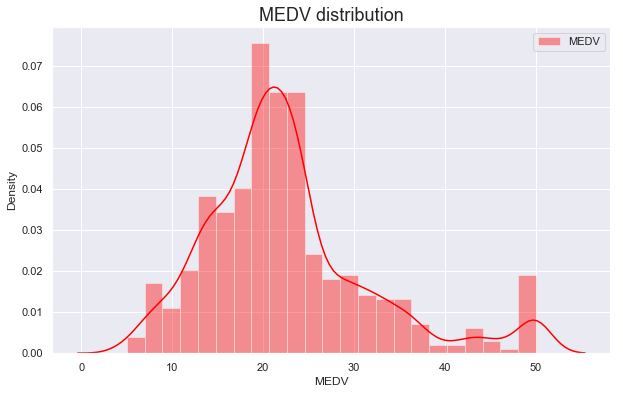

In [5]:
def dist_plot(name):
    sns.set(font_scale = 1)
    f,ax = plt.subplots(figsize = (10,6))
    sns.distplot(data[name],color='red',label=name)
    ax.ticklabel_format(useOffset=False,style='plain')
    plt.title(name+' distribution', size = 18)
    plt.xlabel(name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
dist_plot('MEDV')

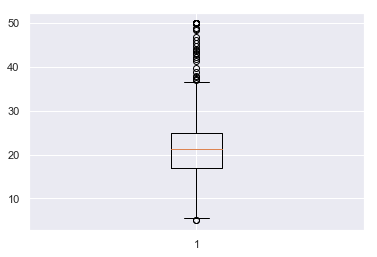

In [6]:
plt.boxplot(data['MEDV'])
plt.show()

In [7]:
for i, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Feature {} has outliers = {}".format(i, perc))

Feature CRIM has outliers = 13.043478260869565
Feature ZN has outliers = 13.438735177865613
Feature INDUS has outliers = 0.0
Feature CHAS has outliers = 100.0
Feature NOX has outliers = 0.0
Feature RM has outliers = 5.928853754940712
Feature AGE has outliers = 0.0
Feature DIS has outliers = 0.9881422924901185
Feature RAD has outliers = 0.0
Feature TAX has outliers = 0.0
Feature PTRATIO has outliers = 2.964426877470356
Feature B has outliers = 15.217391304347826
Feature LSTAT has outliers = 1.383399209486166
Feature MEDV has outliers = 7.905138339920948


###### Drop outliers?

In [8]:
data_new = make_copy(data)
data_new = data_new[data_new['MEDV'] < 50.0]
print(np.shape(data_new))

(490, 14)


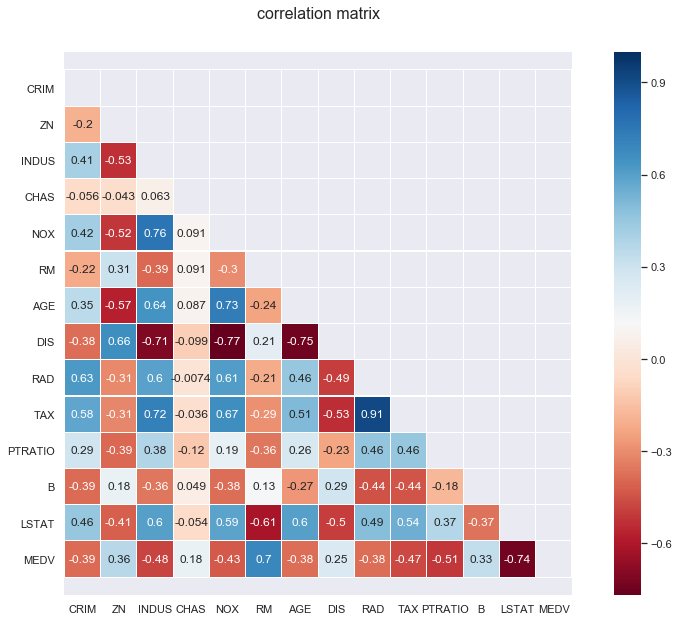

In [10]:
# plt.figure(figsize=(20, 20))
# correlation_matrix = data.corr().round(2)
# sns.heatmap(data=correlation_matrix, annot=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title('correlation matrix', y=1.05, size=16)

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(corr, mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Text(0, 0.5, 'MEDV')

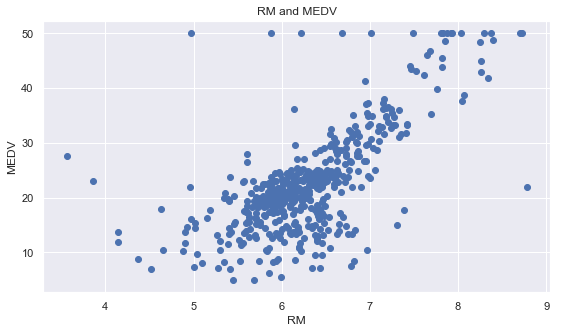

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2 , 2)
x = data['RM']
y = data['MEDV']
plt.scatter(x, y, marker='o')
# plt.plot(X_test, lin.predict(X_test))
plt.title('RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

### Predict MEDV based on given RM

##### Statistical model

In [12]:
import statsmodels.api as sm

In [13]:
# Multiple regression
X = data.iloc[:,0:-1]
y = data['MEDV']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 26 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        19:25:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\Users\hoang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


P < 0.05 =>  statistically significant

##### Machine Learning model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [15]:
# Train/Test split
X, y = pd.DataFrame(data['RM']),data.iloc[:,-1].values
seed = 1003
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Model fitting
lin = LinearRegression()
lin.fit(X_train, y_train)
print('MEDV is predicted as follow: MEDV = {} + {}*RM'.format(lin.intercept_,lin.coef_[0]))

MEDV is predicted as follow: MEDV = -36.969555266535316 + 9.4573624461237*RM


Fitted model performance on training set
RMSE: 6.424753834601825
R2 score: 0.5024393360559152


Fitted model performance on testing set
RMSE: 6.965486772254689
R2 score: 0.44091744110993847


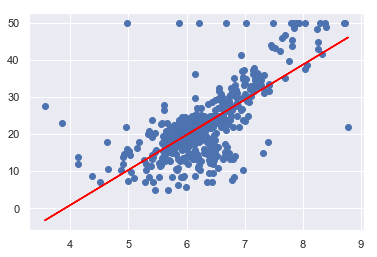

In [16]:
# Model eval
def model_eval(X, y, model):
    y_pred = model.predict(X)
    rmse = (np.sqrt(metrics.mean_squared_error(y, y_pred)))
    r2 = metrics.r2_score(y, y_pred)
    return rmse, r2
# Plot prediction
def model_viz(X, y, model):
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red')
    plt.show()
    
train_rmse, train_r2 = model_eval(X_train, y_train, lin)
test_rmse, test_r2 = model_eval(X_test, y_test, lin)
print('Fitted model performance on training set')
print('RMSE: {}'.format(train_rmse))
print('R2 score: {}'.format(train_r2))
print('\n')
print('Fitted model performance on testing set')
print('RMSE: {}'.format(test_rmse))
print('R2 score: {}'.format(test_r2))

model_viz(X,y,lin)

### Predict MEDV based on all given features

In [17]:
# Train/Test split
X, y = data.iloc[:,:-1],data.iloc[:,-1].values
seed = 1003
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Model fitting
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
train_rmse, train_r2 = model_eval(X_train, y_train, lin)
test_rmse, test_r2 = model_eval(X_test, y_test, lin)
print('Fitted model performance on training set')
print('RMSE: {}'.format(train_rmse))
print('R2 score: {}'.format(train_r2))
print('\n')
print('Fitted model performance on testing set')
print('RMSE: {}'.format(test_rmse))
print('R2 score: {}'.format(test_r2))

Fitted model performance on training set
RMSE: 4.597914365012697
R2 score: 0.7451675023036988


Fitted model performance on testing set
RMSE: 4.965770413609297
R2 score: 0.7158509072022965
